In [1]:
import numpy as np
import pandas as pd
from sklearn import svm, metrics,preprocessing
#from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, auc
from matplotlib import pyplot as plt
from collections import Counter
from scipy.stats import norm
# import seaborn as sns; sns.set(font_scale=1.2)
%matplotlib inline

In [2]:
# path='/home/sultan/EEG/Source_Level_Analysis/25sam_10ms_clear_all_erp.csv'
# path='/home/sultan/EEG/Source_Level_Analysis/50tr10ms_all_clear_erp.csv'
# path="/home/sultan/EEG/Source_Level_Analysis/75sam_10ms_clear_all_erp.csv"
# path="/home/sultan/EEG/Source_Level_Analysis/100sam_10ms_clear_all_erp.csv"
path="/home/sultan/EEG/Source_level_frequency_analysis/100_base_corr_sam_NHIerp_band_features_clear.csv"
# path="/home/sultan/EEG/Source_level_frequency_analysis/100sam_NHIerp_band_features_noise.csv"
dataset =pd.read_csv(path)

In [3]:
Xc=dataset.iloc[:,2:].values
y=dataset.iloc[:,1].values
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(Xc)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.20, random_state=40) 

In [5]:
X_test.shape, y_test.shape

((373, 272), (373,))

In [6]:
np.unique(y_test)
np.unique(y_test,return_counts=True)

(array([0., 1.]), array([151, 222]))

# Grid search

In [7]:
cv=5
from sklearn.model_selection import GridSearchCV
# parameters = {'kernel':['rbf'], 'C':[1, 6.5, 10,20,100,1000],'gamma':[0.01,2/1428.0,1/1428.0]}
parameters = {'kernel':['rbf'], 'C':[1, 6.5, 10,20,100,1000],'gamma':[0.01,0.002,0.00069,0.0007,0.0005]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters,cv=cv)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'kernel': ['rbf'], 'C': [1, 6.5, 10, 20, 100, 1000], 'gamma': [0.01, 0.002, 0.00069, 0.0007, 0.0005]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [8]:
# cv=5
# from sklearn.model_selection import GridSearchCV
# parameters = {'kernel':['rbf'], 'C':[0.90,1.00,1.25],'gamma':[3.0,3.25,3.25 ]}
# svc = svm.SVC()
# clf = GridSearchCV(svc, parameters,cv=cv)
# clf.fit(X_train, y_train)

In [9]:
# Average Scores
#  print clf.cv_results_
# clf.best_estimator_
# np.mean
scores=clf.cv_results_['mean_test_score']
print("Accuracy:%0.3f (+/-%0.3f)" %(scores.mean(), scores.std()*2))

Accuracy:0.916 (+/-0.068)


In [10]:
pred=clf.best_estimator_.predict(X_test)
print "Accuracy:", clf.score(X_test, y_test)  
# print pred
# print y_test
print "support:", len(clf.best_estimator_.support_vectors_)*100.0/(X_train.shape[0])

Accuracy: 0.9624664879356568
support: 51.6129032258


In [11]:
conf_mat=confusion_matrix(y_test,pred)
conf_mat

array([[139,  12],
       [  2, 220]])

In [12]:
from sklearn.metrics import classification_report
#target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

        0.0       0.99      0.92      0.95       151
        1.0       0.95      0.99      0.97       222

avg / total       0.96      0.96      0.96       373



In [13]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9557603961577472

In [14]:
clf.best_estimator_

SVC(C=20, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [15]:
# cv=5
# from sklearn.model_selection import GridSearchCV
# parameters = {'kernel':['rbf'], 'C':[1],'gamma':[0.01 ]}
# svc = svm.SVC()
# clf = GridSearchCV(svc, parameters,cv=cv)
# clf.fit(X_train, y_train)

# Bayesian Optimization

In [16]:
# cv=5
# from sklearn.model_selection import GridSearchCV
# parameters = {'kernel':['rbf'], 'C':[1,5,10*.65,10**0.651,7,8],'gamma':[0.1,0.0005,0.000612,0.0006815,10**-3.20]}
# svc = svm.SVC()
# clf = GridSearchCV(svc, parameters,cv=cv)
# clf.fit(X_train, y_train)
# pred=clf.best_estimator_.predict(X_test)
# print clf.score(X_test, y_test)  
# # print pred
# # print y_test
# print(classification_report(y_test, pred))

In [17]:
# false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pred)
# roc_auc = auc(false_positive_rate, true_positive_rate)
# roc_auc

In [18]:
# clf.best_estimator_

In [19]:
# pred=clf.best_estimator_.predict(X_test)
# print "Accuracy:", clf.score(X_test, y_test)  
# # print pred
# # print y_test
# print "support:", len(clf.best_estimator_.support_vectors_)*100.0/(X_train.shape[0])

In [20]:
# pred=clf.best_estimator_.predict(X_test)
# clf.score(X_test, y_test)  
# # print pred
# # print y_test

In [21]:
# k=0;j=68;
# for i in range(0,21):
#     print k,j
#     k=k+68;j=j+68;

In [22]:
k=0;j=68; acgw=[];
for i in range(0,4):
    cv=5
    from sklearn.model_selection import GridSearchCV
    parameters = {'kernel':['rbf'], 'C':[1, 10,20,30, 40, 50, 60, 70, 90,100,1000],'gamma':[0.01,0.0147, 0.016, 0.019, 0.021, 2/1428.0,1/1428.0]}
    svc = svm.SVC()
    clf = GridSearchCV(svc, parameters,cv=cv)
    clf.fit(X_train[:,k:j], y_train)
    pred=clf.best_estimator_.predict(X_test[:,k:j])
    acc=clf.score(X_test[:,k:j], y_test)
    acgw=np.append(acgw,acc)
    scores=clf.cv_results_['mean_test_score']
    print("Accuracy:%0.3f (+/-%0.3f)" %(scores.mean(), scores.std()*2))
    print acc
    print k,j
    k=k+68;j=j+68;

Accuracy:0.858 (+/-0.082)
0.8873994638069705
0 68
Accuracy:0.866 (+/-0.081)
0.903485254691689
68 136
Accuracy:0.895 (+/-0.073)
0.9329758713136729
136 204
Accuracy:0.916 (+/-0.066)
0.9597855227882037
204 272


In [23]:
clf.best_estimator_

SVC(C=20, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.021, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [24]:
yr=X_test[:,0:68]
yr.shape

(373, 68)

In [25]:
dataset
Xc=dataset.iloc[:,2:].values
y=dataset.iloc[:,1].values
# Xc

In [26]:
X.shape
np.max(acgw)

0.9597855227882037

# Hemisphere

In [27]:
a=range(0,(X.shape[1]),2)
d11=X[:,a];
X_train, X_test, y_train, y_test = train_test_split(d11,y, test_size=.20, random_state=40) 
cv=5
from sklearn.model_selection import GridSearchCV
# parameters = {'kernel':['rbf'], 'C':[1, 10,100,1000],'gamma':[0.01,2/1428.0,1/1428.0]}
parameters = {'kernel':['rbf'], 'C':[1, 10,20,30, 40, 50, 60, 70, 90,100,1000],'gamma':[0.01,0.0147, 0.016, 0.019, 0.021, 2/1428.0,1/1428.0]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters,cv=cv)
clf.fit(X_train, y_train)
pred=clf.best_estimator_.predict(X_test)
print clf.score(X_test, y_test)  
scores=clf.cv_results_['mean_test_score']
print("Accuracy:%0.3f (+/-%0.3f)" %(scores.mean(), scores.std()*2))
# print pred
# print y_test
print(classification_report(y_test, pred))

0.9463806970509383
Accuracy:0.920 (+/-0.056)
             precision    recall  f1-score   support

        0.0       0.97      0.89      0.93       151
        1.0       0.93      0.98      0.96       222

avg / total       0.95      0.95      0.95       373



In [28]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9380108585406598

In [29]:
pred=clf.best_estimator_.predict(X_test)
print "Accuracy:", clf.score(X_test, y_test)  
# print pred
# print y_test
print "support:", len(clf.best_estimator_.support_vectors_)*100.0/(X_train.shape[0])

Accuracy: 0.9463806970509383
support: 36.8951612903


In [30]:
clf.best_estimator_

SVC(C=20, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [31]:
# only 34 features 
parameters = {'kernel':['rbf'], 'C':[1, 10,20,30, 40, 50, 60, 70, 90,100,1000],'gamma':[0.015,0.025, 0.029, 0.030,0.035]}
svc = svm.SVC()
k=0;j=34; acgr=[];
for i in range(0,4):
    cv=5
    from sklearn.model_selection import GridSearchCV
#     parameters = {'kernel':['rbf'], 'C':[1, 10,100,1000],'gamma':[0.01,2/1428.0,1/1428.0]}
    svc = svm.SVC()
    clf = GridSearchCV(svc, parameters,cv=cv)
    clf.fit(X_train[:,k:j], y_train)
    pred=clf.best_estimator_.predict(X_test[:,k:j])
    acc=clf.score(X_test[:,k:j], y_test)
    acgr=np.append(acgr,acc)
    scores=clf.cv_results_['mean_test_score']
    print("Accuracy:%0.3f (+/-%0.3f)" %(scores.mean(), scores.std()*2))
    print acc
    print k,j
    k=k+34;j=j+34;

Accuracy:0.823 (+/-0.038)
0.8176943699731903
0 34
Accuracy:0.828 (+/-0.037)
0.8364611260053619
34 68
Accuracy:0.869 (+/-0.039)
0.8579088471849866
68 102
Accuracy:0.914 (+/-0.027)
0.9195710455764075
102 136


# LH

In [32]:
b=range(1,(X.shape[1]),2)
d22=X[:,b];
X_train, X_test, y_train, y_test = train_test_split(d22,y, test_size=.20, random_state=40) 
cv=5
from sklearn.model_selection import GridSearchCV
# parameters = {'kernel':['rbf'], 'C':[1, 10,100,1000],'gamma':[0.01,2/1428.0,1/1428.0]}
parameters = {'kernel':['rbf'], 'C':[1, 10,20,30, 40, 50, 60, 70, 90,100,1000],'gamma':[0.01,0.0147, 0.016, 0.019, 0.021, 2/1428.0,1/1428.0]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters,cv=cv)
clf.fit(X_train, y_train)
pred=clf.best_estimator_.predict(X_test)
print clf.score(X_test, y_test)  
scores=clf.cv_results_['mean_test_score']
print("Accuracy:%0.3f (+/-%0.3f)" %(scores.mean(), scores.std()*2))
# print pred
# print y_test
print(classification_report(y_test, pred))

0.9195710455764075
Accuracy:0.899 (+/-0.059)
             precision    recall  f1-score   support

        0.0       0.93      0.87      0.90       151
        1.0       0.91      0.95      0.93       222

avg / total       0.92      0.92      0.92       373



In [33]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9112523119145636

In [34]:
pred=clf.best_estimator_.predict(X_test)
print "Accuracy:", clf.score(X_test, y_test)  
# print pred
# print y_test
print "support:", len(clf.best_estimator_.support_vectors_)*100.0/(X_train.shape[0])

Accuracy: 0.9195710455764075
support: 50.0672043011


In [35]:
# acg=[];
# for i in range(0,6,2):
#     acg=np.append(acg,i)

In [36]:
clf.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0147, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [37]:
k=0;j=34; acgl=[];
for i in range(0,4):
    cv=5
    from sklearn.model_selection import GridSearchCV
#     parameters = {'kernel':['rbf'], 'C':[1, 10,100,1000],'gamma':[0.01,2/1428.0,1/1428.0]}
    parameters = {'kernel':['rbf'], 'C':[1, 10,20,30, 40, 50, 60, 70, 90,100,1000],'gamma':[0.015,0.025, 0.029, 0.030,0.035]}
    svc = svm.SVC()
    clf = GridSearchCV(svc, parameters,cv=cv)
    clf.fit(X_train[:,k:j], y_train)
    pred=clf.best_estimator_.predict(X_test[:,k:j])
    acc=clf.score(X_test[:,k:j], y_test)
    acgl=np.append(acgl,acc)
    scores=clf.cv_results_['mean_test_score']
#     print scores
    print("Accuracy:%0.3f (+/-%0.3f)" %(scores.mean(), scores.std()*2))
    print acc
    print k,j
    k=k+34;j=j+34;

Accuracy:0.813 (+/-0.035)
0.8310991957104558
0 34
Accuracy:0.821 (+/-0.038)
0.8471849865951743
34 68
Accuracy:0.871 (+/-0.043)
0.900804289544236
68 102
Accuracy:0.887 (+/-0.034)
0.9142091152815014
102 136


In [38]:
t=np.linspace(0,3,4, endpoint=True)
time=pd.DataFrame(t)
# a=pd.concat([time,pd.DataFrame(acgw),pd.DataFrame(acgl),pd.DataFrame(acgr)],axis=1, keys=[ 'time',"Whole", "LH", "RH"])
a=pd.concat([time,pd.DataFrame(acgw),pd.DataFrame(acgr),pd.DataFrame(acgl)],axis=1, keys=[ 'time',"Whole", "LH", "RH"])

In [39]:
np.max(acgl)
np.max(a.iloc[:,3])

0.9142091152815014

In [40]:
# wpath="/home/sultan/EEG/Source_level_frequency_analysis/Results/"
# dall=a
# # dall.to_csv(wpath+'svm_res_100sam_10ms_clear_v1.csv')
# dall.to_csv(wpath+'svm_res_band_100sam_clear_v1.csv')

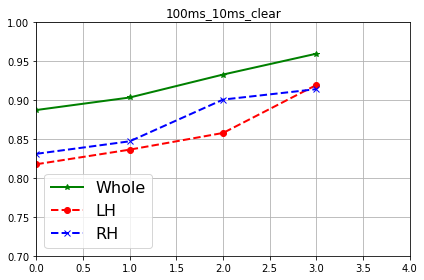

In [41]:
axis_font = {'fontname':'Arial', 'size':'15'}
#tw1=tad.iloc[1:,0];Acdw1=tad.iloc[1:,1];
tw1=a.iloc[0:,0];Acdw=a.iloc[0:,1];Acdlh=a.iloc[0:,2];Acdrh=a.iloc[0:,3]
# plt.plot(tw1,Acdw1,c='g')
plt.plot(tw1,Acdw,'g',linewidth=2,marker='*')
plt.plot(tw1, Acdlh,'--r',linewidth=2,marker='o')
plt.plot(tw1, Acdrh,'--b',linewidth=2,marker='x')
plt.title("100ms_10ms_clear")
plt.xlim(0,4)
plt.ylim(0.7,1)
# plt.plot(tw1,Acdw1, 'k--', label='noise')
# plt.xlabel('Time (ms)',**axis_font)
# plt.ylabel('Accuracy (%)',**axis_font)
# plt.title('Whole brain',**axis_font)
# plt.yticks(**axis_font)
# plt.xticks(**axis_font)
plt.grid(True)
plt.tight_layout()
plt.gca().legend(('Whole','LH','RH'),fontsize=16,loc='best')
# plt.savefig('whole_acc_timem.eps')
# plt.savefig('whole_acc_timem.tif')
plt.show()

In [42]:
len(clf.best_estimator_.support_vectors_)*100.0/(X_train.shape[0])

39.44892473118279

In [43]:
# dall

In [44]:
X_train.shape

(1488, 136)